# **CSMODEL Project: AI Copilot in Education Analysis**
Group 5



## **Introduction**

<p align='justify'>This dataset was made by Emille Villacerat and Celbert Himang as part of their paper “Data on behavioural intention to use AI copilot through TAM and AI ecological education policy lens” last May 13, 2025. According to the paper, the study introduces a dataset examining the behavioral intention of the faculty and students of Cebu Technological University to adopt AI Copilot. The analysis is grounded in the Technology Acceptance Model (TAM) and the AI Ecological Education Policy Framework. Data was gathered through a quantitative survey, administered digitally to a diverse group of participants, including professors and students from different academic departments and year levels.<br>

<p align='justify'>The researchers gathered the data through an online, five point Likert Scale survey to assess the perceptions of AI Copilot adoption amongst respondents of Cebu Technological University. The questions used in the survey were derived from existing literature on technology acceptance and educational frameworks.

<p align='justify'>Each row in the dataset corresponds to one respondent. 414 responses were gathered, however only 396 were deemed valid responses due to low variability of answers from 18 respondents. The whole survey, ranging from demographics, to likert scale questions, totals to 45 variables.

## **Project Requirements**

#### Importing Libraries

In [887]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#### Loading the Dataset

In [888]:
# Clone github repository for the data
!git clone https://github.com/CyAdrienneRamos/csmodel-mco.git
# Load the dataset into a dataframe
file_path_raw = '/content/csmodel-mco/dataset/survey_data_raw.xls'
raw_df = pd.read_excel(file_path_raw, nrows=414)

fatal: destination path 'csmodel-mco' already exists and is not an empty directory.


## **Data Preprocessing**

#### Inspecting the Head and Tail

<p align='justify'>We start the data preprocessing process by inspecting the first and last few rows of the dataframe as a completeness check. It also helps identify preparations needed for the rest of the process.

<p align='justify'>We can immediately see that the column labels are very long and messy. There are also unnecessary columns that we will deal with later. Other than those, the starting and ending rows match the dataset.



In [889]:
# Check if the data is properly imported
raw_df.head(3)

,TimeStamp(OnOpenForm),Timestamp(OnClickSubmit),Duration(in Minutes),"I am aware of the purpose of this survey questionnaire on AI Copilot in Education: A Study on Usage and Acceptance through TAM and AI Ecological Policy Lens. The survey is designed to understand my experiences, perceptions, and attitudes toward using AI",Age:,Sex:,Highest Educational Attainment,Type of respondent,College:,"If student, specify year level",...,PEOU2:My interaction with AI Copilot does not require much mental effort.,PEOU3: It is easy to become skillful using AI Copilot,PEOU4: I found AI Copilot easy to use.,PEOU5: It would be easy for me to find information using AI Copilot.,ITU1: I intend to use AI Copilot to a greater extent.,ITU2: I think doing my schoolwork using AI Copilot is interesting.,ITU3: I believe that AI Copilot is a valuable tool for doing my schoolwork.,ITU4: I will recommend AI Copilot to another schoolmate or colleague.,ITU5: I believe that AI Copilot has given me a unique experience.,Please check the box(es) corresponding to the barriers and challenges that may be encountered in the continuous usage of AI Copilot
0,2024-10-17 21:24:58.000,2024-10-17 21:36:58.000,12,I consent voluntarily to participate in this s...,21,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,4,4,5,5,4,4,5,4,4,AI Copilot ethical dilemma
1,2024-10-17 21:17:47.246,2024-10-17 21:28:47.246,11,I consent voluntarily to participate in this s...,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,5,5,5,4,3,5,5,5,5,"AI Copilot ethical dilemma, Inflexible teachin..."
2,2024-10-17 21:20:07.997,2024-10-17 21:34:07.997,14,I consent voluntarily to participate in this s...,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,3,2,3,5,4,4,3,3,4,AI Copilot ethical dilemma


In [890]:
# Check if the data is properly imported
raw_df.tail(3)

,TimeStamp(OnOpenForm),Timestamp(OnClickSubmit),Duration(in Minutes),"I am aware of the purpose of this survey questionnaire on AI Copilot in Education: A Study on Usage and Acceptance through TAM and AI Ecological Policy Lens. The survey is designed to understand my experiences, perceptions, and attitudes toward using AI",Age:,Sex:,Highest Educational Attainment,Type of respondent,College:,"If student, specify year level",...,PEOU2:My interaction with AI Copilot does not require much mental effort.,PEOU3: It is easy to become skillful using AI Copilot,PEOU4: I found AI Copilot easy to use.,PEOU5: It would be easy for me to find information using AI Copilot.,ITU1: I intend to use AI Copilot to a greater extent.,ITU2: I think doing my schoolwork using AI Copilot is interesting.,ITU3: I believe that AI Copilot is a valuable tool for doing my schoolwork.,ITU4: I will recommend AI Copilot to another schoolmate or colleague.,ITU5: I believe that AI Copilot has given me a unique experience.,Please check the box(es) corresponding to the barriers and challenges that may be encountered in the continuous usage of AI Copilot
411,2024-10-28 12:41:05.672,2024-10-28 12:50:05.672,9,I consent voluntarily to participate in this s...,19,Female,College Level,Student,"College of Computer, Information and Communica...",Second Year,...,2,2,4,4,4,4,2,4,4,"AI Copilot ethical dilemma, AI Copilot privacy..."
412,2024-10-28 14:36:35.273,2024-10-28 14:50:35.273,14,I consent voluntarily to participate in this s...,19,Female,College Level,Student,College of Management and Entrepreneurship,Second Year,...,3,3,3,3,3,3,3,4,4,"AI Copilot ethical dilemma, AI Copilot privacy..."
413,2024-10-28 19:15:49.326,2024-10-28 19:29:49.326,14,I consent voluntarily to participate in this s...,19,Female,College Level,Student,College of Management and Entrepreneurship,Second Year,...,3,3,4,4,3,4,5,5,5,"AI Copilot privacy concern, AI Copilot gives i..."


#### Cleaning the Columns

<p align='justify'>We will be removing the unnecessary columns and renaming the rest with more concise labels and use the question codes from the survey questionnaire if applicable. We will also not be using the columns for timestamps, duration, and consent.

In [891]:
# We will not be using the timestamps, duration, and consent
raw_df = raw_df.drop(columns=raw_df.columns[[0, 1, 3, -1]])
raw_df.columns

Index(['Duration(in Minutes)', 'Age:', 'Sex:',
       'Highest  Educational Attainment', 'Type of respondent', 'College:',
       'If student, specify year level', 'Years of AI usage',
       'RAE1: The assessment design should allow AI such as AI Copilot to enhance learning outcomes.',
       'RAE2: An assessment must focus on students' comprehension',
       'RAE3: Assessment must be automated scoring.',
       'RAE4: Teachers must use portfolio assessments to track students’ progress. ',
       'RAE5: Teachers must use rubrics to set clear performance standards, allowing for fair and organized assessment of student work.',
       'RAE6: The assessment design should not allow AI Copilot to enhance learning outcomes. ',
       'GS1: Teachers must teach the students to evaluate the credibility of AI Copilot-generated content.',
       'GS2: Teachers must create learning activities incorporating instructional strategies that enhance students’ critical thinking skills.',
       'GS3: The

In [892]:
# We first take the parts before each ":"
raw_df.columns = raw_df.columns.str.split(':').str[0]
raw_df.columns

Index(['Duration(in Minutes)', 'Age', 'Sex', 'Highest  Educational Attainment',
       'Type of respondent', 'College', 'If student, specify year level',
       'Years of AI usage', 'RAE1', 'RAE2', 'RAE3', 'RAE4', 'RAE5', 'RAE6',
       'GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5',
       'BA1', 'BA2', 'BA3', 'BA4', 'BA5', 'PU1', 'PU2', 'PU3', 'PU4', 'PU5',
       'PU6', 'PEOU1', 'PEOU2', 'PEOU3', 'PEOU4', 'PEOU5', 'ITU1', 'ITU2',
       'ITU3', 'ITU4', 'ITU5'],
      dtype='object')

In [893]:
# Then we list the replacement names for some of the labels
columns_keys_map = {
    'Duration(in Minutes)':'Duration',
    'Highest  Educational Attainment':'Education',
    'Type of respondent':'Respondent',
    'If student, specify year level':'YearLevel',
    'Years of AI usage':'UsageYears',
    'Please check the box(es) corresponding to the barriers and challenges that may be encountered in the continuous usage of AI Copilot':'Barriers'
}
# Then apply the changes
raw_df.columns = [columns_keys_map.get(x, x) for x in raw_df.columns]
raw_df.columns

Index(['Duration', 'Age', 'Sex', 'Education', 'Respondent', 'College',
       'YearLevel', 'UsageYears', 'RAE1', 'RAE2', 'RAE3', 'RAE4', 'RAE5',
       'RAE6', 'GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'PS1', 'PS2', 'PS3', 'PS4',
       'PS5', 'BA1', 'BA2', 'BA3', 'BA4', 'BA5', 'PU1', 'PU2', 'PU3', 'PU4',
       'PU5', 'PU6', 'PEOU1', 'PEOU2', 'PEOU3', 'PEOU4', 'PEOU5', 'ITU1',
       'ITU2', 'ITU3', 'ITU4', 'ITU5'],
      dtype='object')

In [894]:
raw_df.head()

,Duration,Age,Sex,Education,Respondent,College,YearLevel,UsageYears,RAE1,RAE2,...,PEOU1,PEOU2,PEOU3,PEOU4,PEOU5,ITU1,ITU2,ITU3,ITU4,ITU5
0,12,21,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,5,5,...,4,4,4,5,5,4,4,5,4,4
1,11,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,5,3,...,3,5,5,5,4,3,5,5,5,5
2,14,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,5,5,...,5,3,2,3,5,4,4,3,3,4
3,15,19,Male,College Level,Student,"College of Computer, Information and Communica...",Second Year,1 - 2 years,4,4,...,4,4,4,4,4,4,3,3,3,3
4,13,19,Female,College Level,Student,"College of Computer, Information and Communica...",Second Year,0 - 1 year,4,5,...,4,4,4,4,4,4,4,4,4,4


#### Completeness and Data Types

<p align='justify'>Using the info method, we can see that we have some null values in the YearLevel and Barriers columns. Some column data types also defaulted to objects. We will be dealing with these in the following sections.

In [895]:
# Here we see the columns, number of rows, data types, and null counts
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Duration    414 non-null    int64 
 1   Age         414 non-null    int64 
 2   Sex         414 non-null    object
 3   Education   414 non-null    object
 4   Respondent  414 non-null    object
 5   College     414 non-null    object
 6   YearLevel   387 non-null    object
 7   UsageYears  414 non-null    object
 8   RAE1        414 non-null    int64 
 9   RAE2        414 non-null    int64 
 10  RAE3        414 non-null    int64 
 11  RAE4        414 non-null    int64 
 12  RAE5        414 non-null    int64 
 13  RAE6        414 non-null    int64 
 14  GS1         414 non-null    int64 
 15  GS2         414 non-null    int64 
 16  GS3         414 non-null    int64 
 17  GS4         414 non-null    int64 
 18  GS5         414 non-null    int64 
 19  PS1         414 non-null    int64 
 20  PS2       

#### Removing the 18 Excluded Respondents

<p align='justify'>Since the study did not mention the specific responses that they have excluded, then we will attempt to identify the 18 "low variability" responses. An assumption would be that these will be the 18 lowest standard deviation for the 1-5 Likert scale questions.

In [896]:
# Take Likert scale questions
likert = raw_df.loc[:, 'RAE1':'ITU5']
# Compute for std
raw_df['likert_std'] = likert.std(axis=1)
# Remove the suspicious entries
df = raw_df.sort_values(by='likert_std').iloc[18:]

We then verify the values of the `clean_df` with the values shown in the paper.


In [897]:
# The age group counts match the paper's values
age_bins = [0, 24, 34, 44, 54, 100]
age_bin_labels = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55+ years']
df['AgeGroup'] =  pd.cut(df['Age'], bins=age_bins, labels=age_bin_labels)
df['AgeGroup'].value_counts()

,count
AgeGroup,
18-24 years,374
25-34 years,12
35-44 years,6
45-54 years,3
55+ years,1


In [898]:
# The college counts match the paper's values
df['College'].value_counts()

,count
College,
"College of Computer, Information and Communications Technology",138
College of Technology,71
College of Education,67
College of Engineering,46
College of Arts and Sciences,35
College of Management and Entrepreneurship,34
College of Nursing,3
College of Hospitality and tourism management,1
College of Customs,1


In [899]:
# The mean values for these columns match the values presented in the paper.
df.loc[:, 'RAE1':'RAE5'].mean()

,0
RAE1,3.646465
RAE2,4.090909
RAE3,3.419192
RAE4,4.025253
RAE5,4.280303


Based on the tests, we now accept this cleaned dataframe containing the data used in the paper.

In [900]:
df = df.reset_index(drop=True)

### **Data Cleaning**

#### Shorten College Column Values

<p align='justify'>We shorten the names of the colleges to better fit the names in the visualizations later.

In [901]:
# No problems with the unique values and counts
df['College'].value_counts(dropna=False)

,count
College,
"College of Computer, Information and Communications Technology",138
College of Technology,71
College of Education,67
College of Engineering,46
College of Arts and Sciences,35
College of Management and Entrepreneurship,34
College of Nursing,3
College of Hospitality and tourism management,1
College of Customs,1


In [902]:
# Shorten the names
df['College'] = df['College'].replace({
    'College of Computer, Information and Communications Technology': 'CICT',
    'College of Technology': 'COT',
    'College of Education': 'COE',
    'College of Engineering': 'COEENG',
    'College of Arts and Sciences': 'CAS',
    'College of Management and Entrepreneurship': 'CME',
    'College of Nursing': 'CON',
    'College of Hospitality and tourism management ': 'CHTM',
    'College of Customs': 'COC'
})
df['College'].value_counts(dropna=False)

,count
College,
CICT,138
COT,71
COE,67
COEENG,46
CAS,35
CME,34
CON,3
CHTM,1
COC,1


#### Combine Similar Education Column Values

<p align='justify'>We combine some values to match the values in the original study then shorten the name.

In [903]:
df['Education'].value_counts()

,count
Education,
College Level,363
Bachelor's Degree,16
Master's Degree,8
"Doctorate Degree (PhD, EdD)",5
"Professional Degree (JD, MD)",1
Senior High School Graduate,1
Still a college student,1
Currently A 2nd Year College Student,1


In [904]:
# Collapse the categories
df['Education'] = df['Education'].replace({
    "College Level": "College",
    "Currently A 2nd Year College Student ": "College",
    "Still a college student ": "College",
    "Senior High School Graduate ": "College",
    "Bachelor's Degree": "Bachelor’s",
    "Master's Degree": "Master’s",
    "Doctorate Degree (PhD, EdD)": "Doctorate",
    "Professional Degree (JD, MD)": "Doctorate"
})
df['Education'].value_counts()

,count
Education,
College,366
Bachelor’s,16
Master’s,8
Doctorate,6


#### Use Placeholders for the Missing Values in YearLevel

Fill the missing values of YearLevel with "NA"

In [905]:
df['YearLevel'].value_counts(dropna=False)

,count
YearLevel,
Second Year,194
First Year,94
Third Year,54
Fourth Year,27
NaN,27


In [906]:
df['YearLevel'] = df['YearLevel'].fillna('NA')
df['YearLevel'].value_counts(dropna=False)

,count
YearLevel,
Second Year,194
First Year,94
Third Year,54
Fourth Year,27
NA,27


#### Convert Categorical Columns to the Proper Data Types

We check the unique values of each column then convert to categories.

In [907]:
df['Sex'].value_counts(dropna=False)

,count
Sex,
Female,200
Male,196


In [908]:
df['Respondent'].value_counts(dropna=False)

,count
Respondent,
Student,372
Teacher,24


In [909]:
df['UsageYears'].value_counts(dropna=False)

,count
UsageYears,
1 - 2 years,185
0 - 1 year,137
3 - 4 years,47
beyond 4 years,27


In [910]:
cat_cols = ['College', 'Education', 'YearLevel', 'Sex', 'Respondent', 'UsageYears']
for col in cat_cols:
  df[col] = pd.Categorical(df[col], categories=df[col].unique())

#### Check the Numerical Columns

Check the values and measures of the numerical columns

In [911]:
num_cols = ['Duration', 'Age', 'RAE1', 'RAE2', 'RAE3', 'RAE4', 'RAE5', 'RAE6',
            'GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'PS1', 'PS2', 'PS3', 'PS4',
            'PS5', 'BA1', 'BA2', 'BA3', 'BA4', 'BA5', 'PU1', 'PU2', 'PU3',
            'PU4', 'PU5', 'PU6', 'PEOU1', 'PEOU2', 'PEOU3', 'PEOU4', 'PEOU5',
            'ITU1','ITU2', 'ITU3', 'ITU4', 'ITU5']
num_result = df[num_cols].agg(['mean', 'std', 'min', 'max', lambda x: x.isnull().sum()]).T
num_result = num_result.rename(columns={'<lambda>': 'num_nulls'})
num_result

,mean,std,min,max,num_nulls
Duration,11.962121,1.992665,9.0,15.0,0.0
Age,20.757576,4.498868,18.0,57.0,0.0
RAE1,3.646465,1.051226,1.0,5.0,0.0
RAE2,4.090909,1.027135,1.0,5.0,0.0
RAE3,3.419192,1.051117,1.0,5.0,0.0
RAE4,4.025253,1.043057,1.0,5.0,0.0
RAE5,4.280303,1.048068,1.0,5.0,0.0
RAE6,3.053030,1.122707,1.0,5.0,0.0
GS1,3.931818,1.059208,1.0,5.0,0.0
GS2,4.257576,1.013488,1.0,5.0,0.0


### **Adding Aggregate Columns**

<p align='justify'>We will be adding columns for the means of the ratings within each construct group, excluding the opposite questions (labeled sincerity questions in the survey).

---



In [912]:
group_means = ['RAE_mean', 'GS_mean', 'PS_mean', 'BA_mean', 'PU_mean', 'PEOU_mean', 'ITU_mean']

df['RAE_mean'] = df.loc[:, "RAE1":"RAE5"].mean(axis=1)
df['GS_mean'] = df.loc[:, "GS1":"GS5"].mean(axis=1)
df['PS_mean'] = df.loc[:, "PS1":"PS5"].mean(axis=1)
df['BA_mean'] = df.loc[:, "BA1":"BA5"].mean(axis=1)
df['PU_mean'] = df.loc[:, "PU1":"PU5"].mean(axis=1)
df['PEOU_mean'] = df.loc[:, "PEOU1":"PEOU5"].mean(axis=1)
df['ITU_mean'] = df.loc[:, "ITU1":"ITU5"].mean(axis=1)

# **Exploratory Data Analysis**

<p align='justify'>For this section, we will be looking at the measures and visualizations to answer the following EDA questions:

1. What are the demographic characteristics of respondents, and are there unusual patterns?
2. Are there indications of careless or invalid responses?
3. How do the descriptive statistics of the constructs change after removing low-quality responses?
4. Does removing low-quality responses affect relationships among constructs

### **What are the demographic characteristics of respondents, and are there unusual patterns?**

<p align='justify'>Before analyzing the main survey responses, it is important to understand the demographic profile of the respondents. Examining characteristics such as age, gender, college affiliation, year level, and educational attainment provides context for interpreting the survey results and helps identify any unusual or unexpected patterns in the data.

<p align='justify'>This step also allows us to identify distribution patterns (such as skewed representation) and detect potential biases (over- or under-represented demographics).

<p align='justify'>By summarizing these characteristics, we can ensure that subsequent analyses are interpreted with awareness of the sample’s composition and any anomalies that may affect the findings.

<p align='justify'>We start by plotting the distributions of the respondents by each demographic category. This will give us an insight on the possible bias in the data.


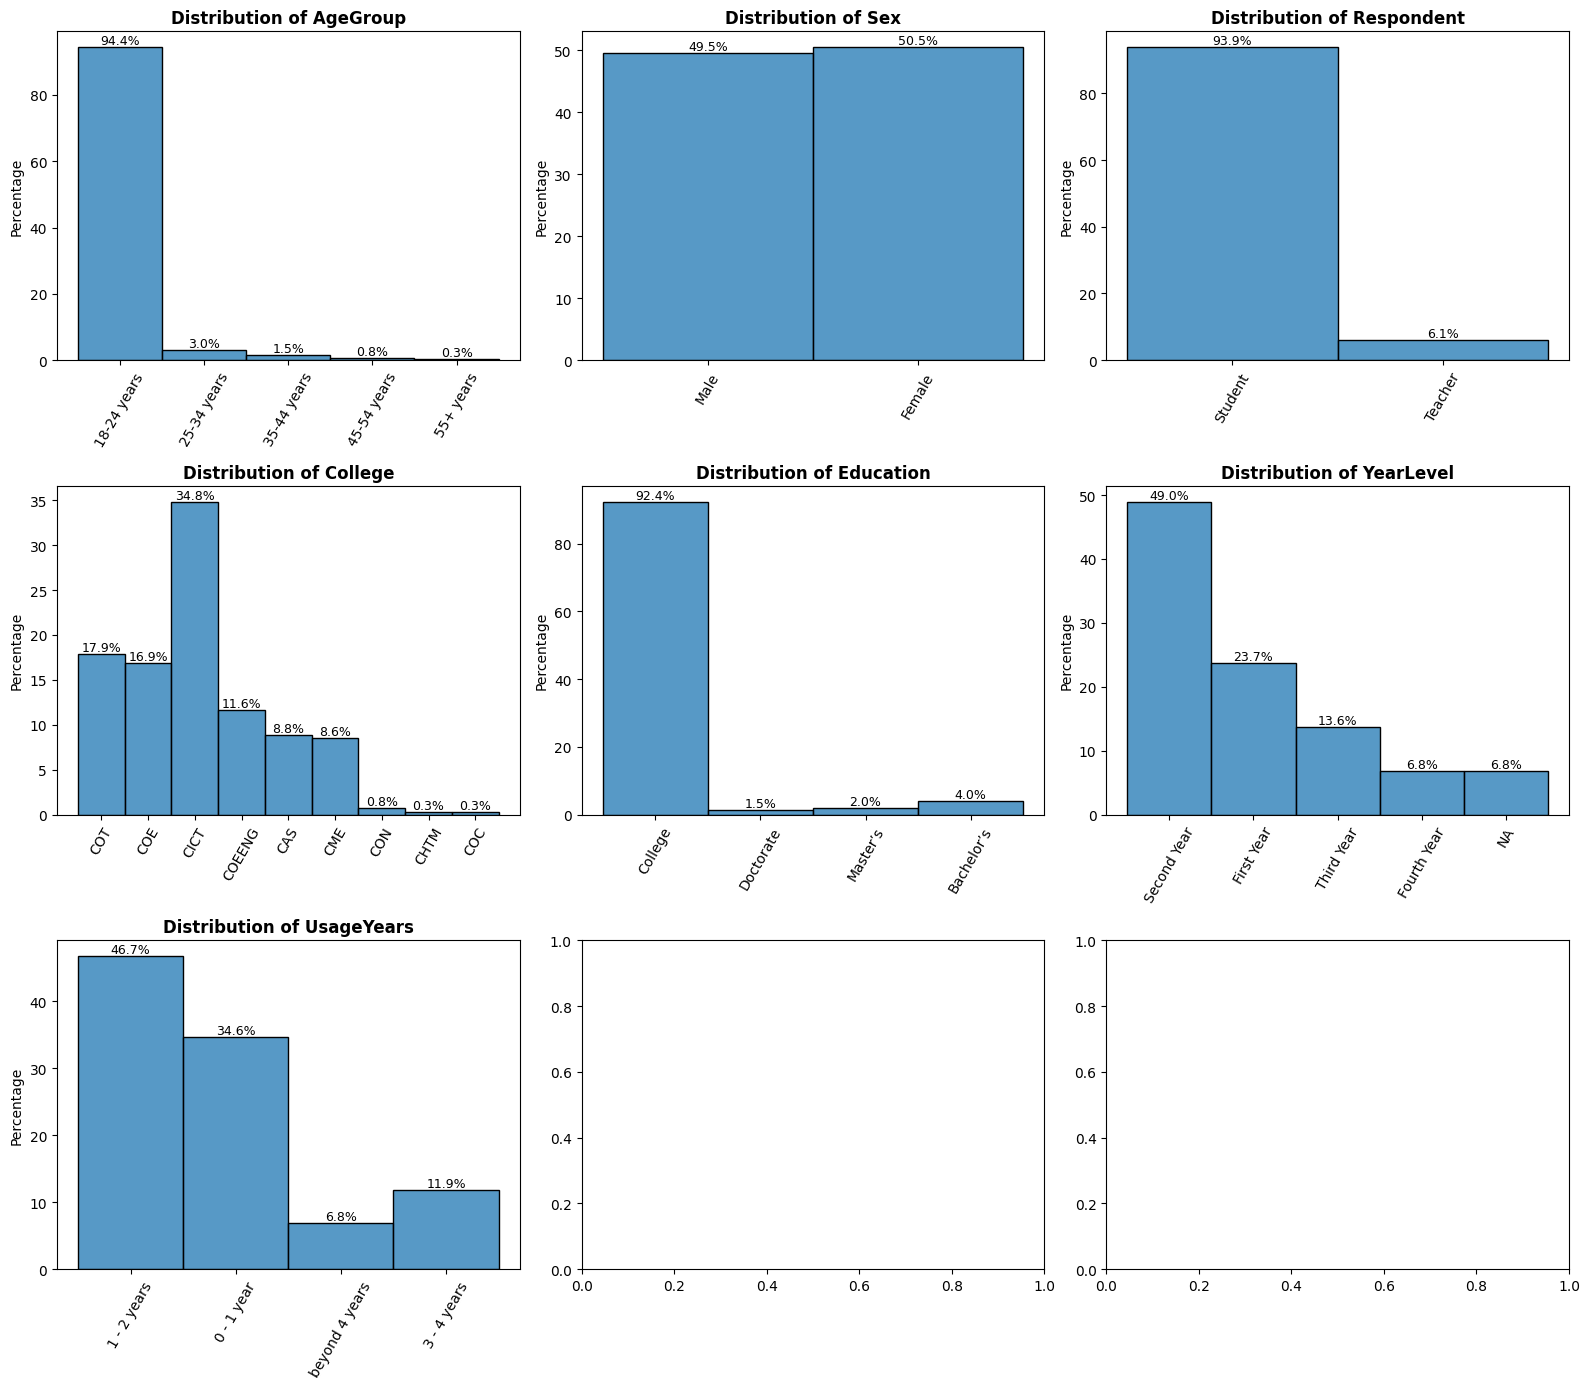

In [913]:
def add_percent_histplot(axes, i, df, col):
  total = len(df[col].dropna())
  sns.histplot(
      data=df,
      x=col,
      stat='percent',
      ax=axes[i],
      discrete=True
  )

  axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
  axes[i].set_ylabel('Percentage')
  axes[i].set_xlabel('')
  axes[i].tick_params(axis='x', rotation=60)

  for container in axes[i].containers:
      axes[i].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

demo_cols = ['AgeGroup', 'Sex', 'Respondent', 'College', 'Education', 'YearLevel', 'UsageYears']

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(demo_cols):
    add_percent_histplot(axes, i, df, col)

plt.tight_layout()
plt.show()

In [914]:
# We also print out the values
demographic_summary = {}
for col in demo_cols:
    counts = df[col].value_counts().to_frame('Count')
    counts['Percentage'] = 100 * counts['Count'] / counts['Count'].sum()
    demographic_summary[col] = counts
    print(f"\n{col} Summary:\n", counts, "\n")


AgeGroup Summary:
              Count  Percentage
AgeGroup                      
18-24 years    374   94.444444
25-34 years     12    3.030303
35-44 years      6    1.515152
45-54 years      3    0.757576
55+ years        1    0.252525 


Sex Summary:
         Count  Percentage
Sex                      
Female    200   50.505051
Male      196   49.494949 


Respondent Summary:
             Count  Percentage
Respondent                   
Student       372   93.939394
Teacher        24    6.060606 


College Summary:
          Count  Percentage
College                   
CICT       138   34.848485
COT         71   17.929293
COE         67   16.919192
COEENG      46   11.616162
CAS         35    8.838384
CME         34    8.585859
CON          3    0.757576
CHTM         1    0.252525
COC          1    0.252525 


Education Summary:
             Count  Percentage
Education                    
College       366   92.424242
Bachelor’s     16    4.040404
Master’s        8    2.020202
Doctora

<p align='justify'>The dataset is primarily composed of young respondents aged 18–24 years (94.44%), with only a small fraction belonging to older age brackets. This concentration indicates that the survey largely reflects the views of younger individuals, most of whom are still in college. The sample also shows that students make up 93.94% of all respondents, while only 6.06% are teachers. This strong imbalance suggests that insights drawn from the data will predominantly represent student perspectives rather than those of educators or staff.

<p align='justify'>The gender distribution is balanced, with females (50.51%) and males (49.49%) almost equally represented, minimizing the likelihood of gender bias in subsequent analyses. In terms of educational attainment, a large majority are at the college level (92.37%), with smaller portions having completed a Bachelor’s (4.07%), Master’s (2.04%), or Doctorate degree (1.53%). This confirms that the dataset is dominated by current college students, aligning with the age and respondent type distributions.

<p align='justify'>The College affiliation of respondents shows a strong concentration in technology-related disciplines. The College of Computer, Information and Communications Technology (CICT) contributes the most responses (34.85%), followed by the College of Technology (17.93%), College of Education (16.92%), and College of Engineering (11.62%). Other colleges make smaller contributions, such as Arts and Sciences, Management and Entrepreneurship, Nursing, Hospitality and Tourism Management, and Customs, each representing less than 10% of the total. This uneven participation suggests that the dataset is skewed toward technology-oriented programs, which could influence the attitudes reported, particularly in studies involving system use or digital adoption.

<p align='justify'>The year level distribution further supports this pattern where nearly half are second-year students (48.99%), followed by first-year students (23.74%), with smaller groups in the third (13.64%) and fourth year (6.82%), and 6.82% unspecified. This indicates that most respondents are relatively early in their academic journey, which might affect their experience-based evaluations. Similarly, the usage experience variable shows that 46.72% have used the system for 1–2 years, while 34.60% have less than a year of exposure. Only a few have used it for more than three years, suggesting that most participants are still in the early stages of adapting AI.

<p align='justify'>Overall, the demographic profile reveals a young, predominantly student population concentrated in technology-oriented colleges with limited long-term experience. While this provides a clear view of the primary user base, it also highlights potential sampling bias and representation issues that should be considered in later analyses, especially when examining patterns of behavior or perceptions across different demographic groups.

### **Are there indications of careless or invalid responses?**

<p align='justify'>An important step in survey analysis is to assess the quality and validity of responses. Some respondents may answer carelessly, providing inconsistent, random, or patterned responses that can bias the results.

<p align='justify'>To detect such issues, we examine multiple indicators of response quality, including:

1. Response duration – unusually short completion times may suggest respondents did not thoughtfully answer the questions.

2. Straightlining – checking for low variability in responses (e.g., very low standard deviation across questions) that may indicate repetitive or uniform answers.

3. Opposite questions – verifying that responses to questions with opposite meanings are consistent. Inconsistent answers may signal inattention or invalid data.

<p align='justify'>By systematically applying these checks, we can flag or remove potentially invalid responses, ensuring that subsequent analyses reflect genuine and meaningful patterns in the survey data.

#### Inspecting Duration Distribution

<p align='justify'>We can start by checking the duration of each response. By simply looking at the plots, we can verify that there are no outliers for the duration column.

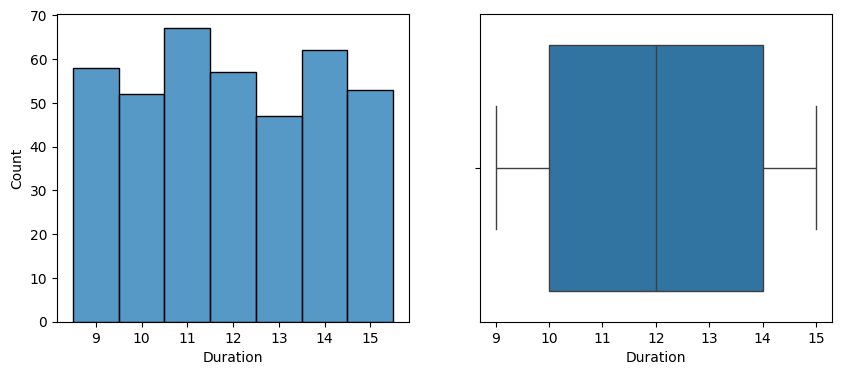

In [915]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

sns.histplot(df, x='Duration', discrete=True, ax=axes[0])
sns.boxplot(df, x='Duration', ax=axes[1])

plt.show()

#### Detecting Straightlining

<p align='justify'>Next is we look for responses with low variability suggesting "straight-lining" which means that they simply selected similar or almost similar answers for each question. We can see from the plot that there are still some entries with low variability.

<Axes: xlabel='likert_std', ylabel='Count'>

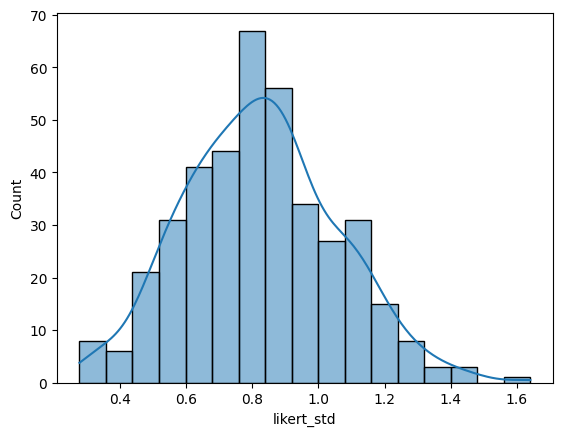

In [916]:
sns.histplot(df, x='likert_std', kde=True)

#### Checking Consistency with Opposite Questions

<p align='justify'>Some survey questions are designed with opposite meanings. For example, one question may assess agreement with a positive statement while another measures agreement with a logically opposite statement. In attentive responses, high scores on one question should correspond to low scores on its opposite.

<p align='justify'>To identify potentially invalid responses, we calculated consistency flags for selected opposite question pairs. A value of True indicates that the respondent’s answers deviated substantially from the expected inverse pattern, suggesting possible inattention or random answering.

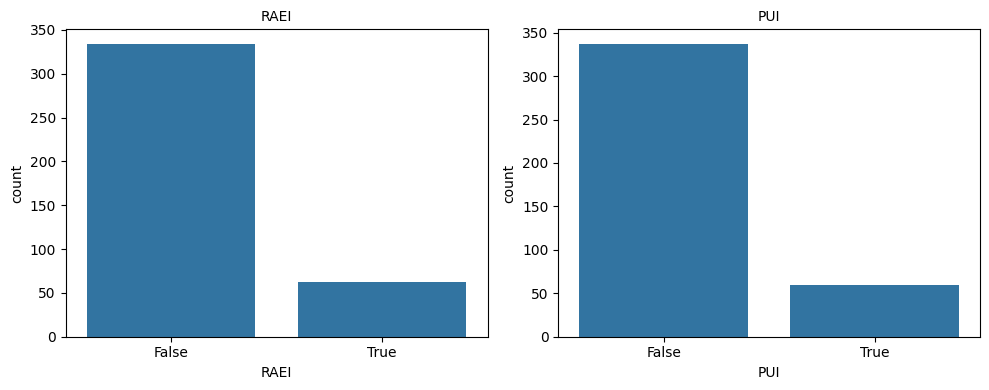

In [917]:
# Values will be true if the answer is likely invalid
df['RAEI'] = abs(6 - df['RAE1'] - df['RAE6']) > 2
df['PUI'] = abs(6 - df['PU1'] - df['PU6']) > 2

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

for i, col in enumerate(['RAEI', 'PUI']):
    sns.countplot(df, x=col, ax=axes[i])
    axes[i].set_title(col, fontsize=10)

plt.tight_layout()
plt.show()


#### Separating Identified Low-Quality Responses

<p align='justify'>Finally, we will split the dataset into two separate ones, where one will have low quality responses based on the consistency flags along with low overall response variability (likert_std < 0.3), while the other will have the remaining high quality responses.

In [918]:
# Low quality responses
lq_df = df[df['RAEI'] | df['PUI'] | (df['likert_std'] < 0.3)]
# High quality responses
hq_df = df[~df.index.isin(lq_df.index)]

<p align='justify'>Out of the initial 396 responses, 99 were flagged and removed, leaving 297 high-quality responses for analysis. This suggests that while a notable subset of respondents exhibited potential inconsistencies or very low response variability, the majority of participants provided attentive and consistent answers. By excluding the low-quality responses, we ensure that subsequent analyses reflect meaningful patterns in the survey data, reducing the influence of noise or invalid entries.

### **How do the descriptive statistics of the constructs change after removing low-quality responses?**

<p align='justify'>To evaluate how low-quality responses affected the survey data, we compared the means and standard deviations of all items before and after filtering out flagged responses. We compute the change by taking the difference between the cleaned and original data. These differences were visualized using bar plots for both mean and standard deviation changes across all questions.

In [924]:
df_stats = df.loc[:, 'RAE1':'ITU5'].agg(['mean', 'std']).T
hq_stats = hq_df.loc[:, 'RAE1':'ITU5'].agg(['mean', 'std']).T

indiv_stats = pd.concat([
    hq_stats.add_suffix('_cleaned'),
    df_stats.add_suffix('_original'),
], axis=1)


indiv_stats['mean_diff'] = hq_stats['mean'] - df_stats['mean']
indiv_stats['std_diff'] = hq_stats['std'] - df_stats['std']
indiv_stats

,mean_cleaned,std_cleaned,mean_original,std_original,mean_diff,std_diff
RAE1,3.535354,0.922465,3.646465,1.051226,-0.111111,-0.128761
RAE2,4.060606,0.967214,4.090909,1.027135,-0.030303,-0.059920
RAE3,3.323232,0.991466,3.419192,1.051117,-0.095960,-0.059650
RAE4,4.000000,0.969118,4.025253,1.043057,-0.025253,-0.073939
RAE5,4.286195,1.014545,4.280303,1.048068,0.005892,-0.033523
RAE6,2.777778,0.943207,3.053030,1.122707,-0.275253,-0.179500
GS1,3.912458,1.002908,3.931818,1.059208,-0.019360,-0.056300
GS2,4.272727,0.967214,4.257576,1.013488,0.015152,-0.046273
GS3,3.595960,0.918127,3.669192,1.000840,-0.073232,-0.082714
GS4,4.191919,0.922798,4.202020,0.983199,-0.010101,-0.060401


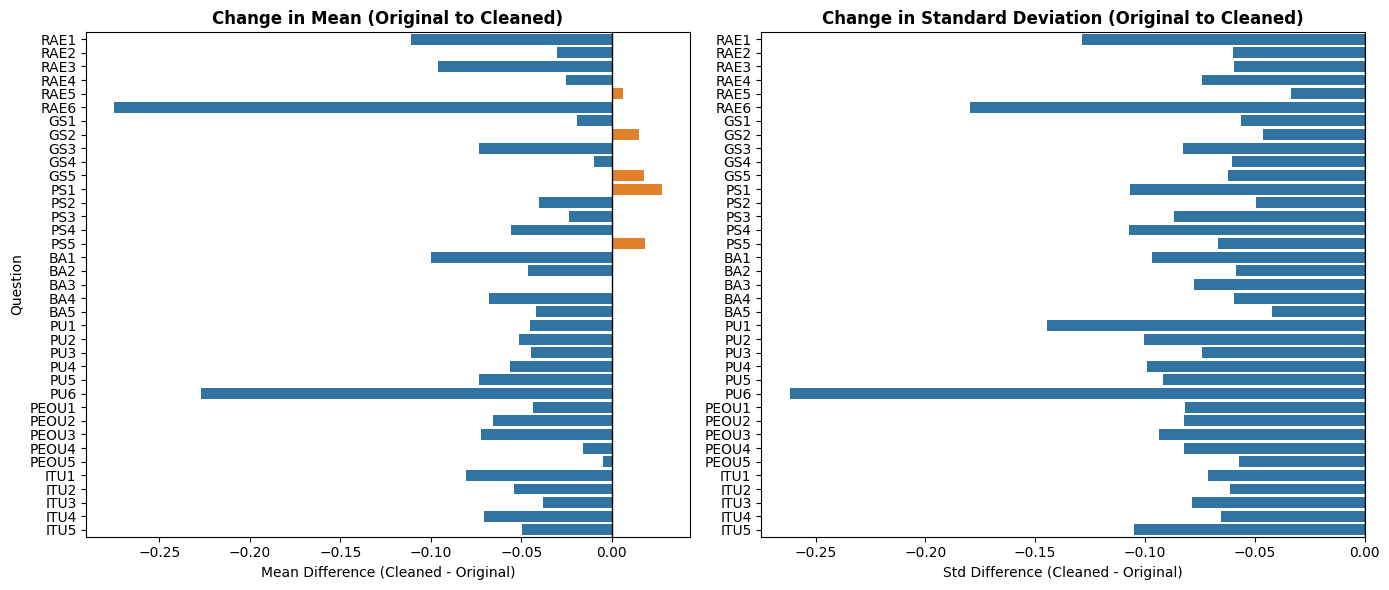

In [926]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(
    data=indiv_stats,
    x='mean_diff',
    y=indiv_stats.index,
    hue=indiv_stats['mean_diff'] > 0,
    ax=axes[0],
    legend=False
)

axes[0].axvline(0, color='black', linewidth=1)
axes[0].set_title('Change in Mean (Original to Cleaned)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Mean Difference (Cleaned - Original)')
axes[0].set_ylabel('Question')

sns.barplot(
    data=indiv_stats,
    x='std_diff',
    y=indiv_stats.index,
    hue=indiv_stats['std_diff'] > 0,
    ax=axes[1],
    legend=False
)

axes[1].axvline(0, color='black', linewidth=1)
axes[1].set_title('Change in Standard Deviation (Original to Cleaned)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Std Difference (Cleaned - Original)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

<p align='justify'>After removing responses flagged as potentially inattentive or inconsistent, the descriptive statistics of the survey items showed some small but possibly meaningful changes. Most items experienced slight decreases in mean values, generally under 0.1 on the 5-point scale, with the largest reductions observed for RAE6 (−0.28) and PU6 (−0.23). This indicates that low-quality responses had slightly inflated the scores for these items, and their removal provides a more accurate reflection of respondents’ true attitudes.

<p align='justify'>Standard deviations also decreased across all items, reflecting reduced variability after filtering out extreme or uniform responses. The most notable reductions occurred for PU6 (−0.26) and RAE6 (−0.18), demonstrating that these items were most affected by inconsistent answering. This follows the idea that the respondents paying attention would answer these two questions containing opposite meanings, differently than those not paying attention.

<p align='justify'>Overall, while the general trends and central tendencies of the constructs remained stable, removing low-quality responses improved the consistency and reliability of the dataset, ensuring that subsequent analyses are based on more attentive and meaningful responses.


### Does removing low-quality responses affect relationships among constructs

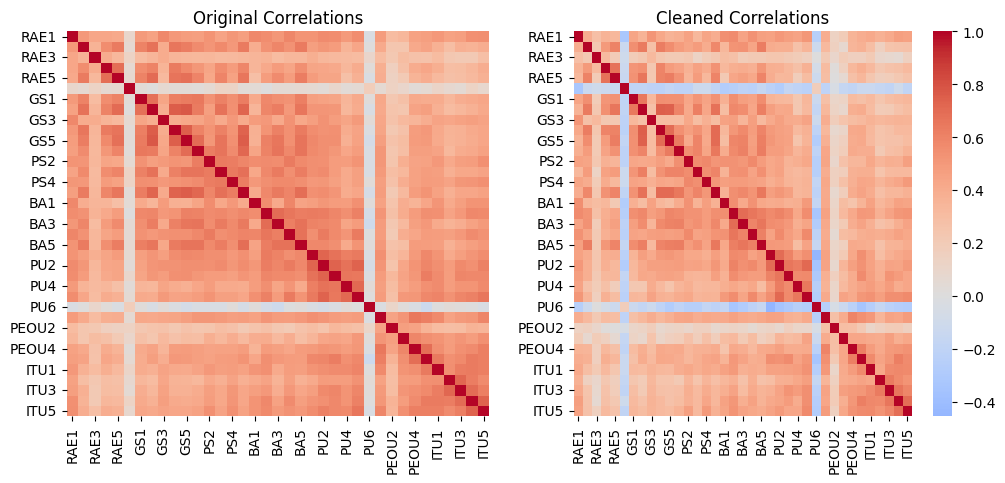

In [921]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(df.loc[:, 'RAE1':'ITU5'].corr(), ax=axes[0], cmap='coolwarm', center=0, cbar=False)
axes[0].set_title('Original Correlations')
sns.heatmap(hq_df.loc[:, 'RAE1':'ITU5'].corr(), ax=axes[1], cmap='coolwarm', center=0)
axes[1].set_title('Cleaned Correlations')
plt.show()

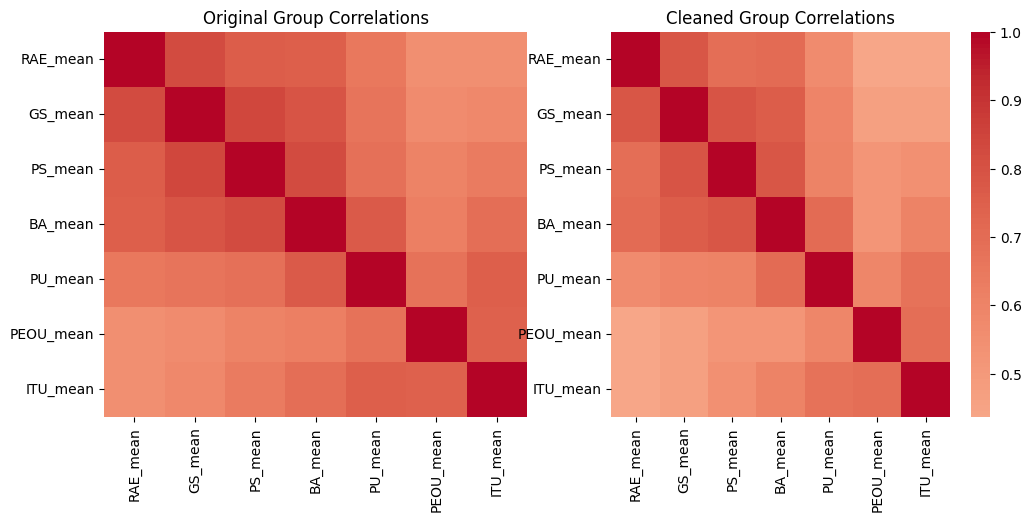

In [922]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(df.loc[:, 'RAE_mean':'ITU_mean'].corr(), ax=axes[0], cmap='coolwarm', center=0, cbar=False)
axes[0].set_title('Original Group Correlations')
sns.heatmap(hq_df.loc[:, 'RAE_mean':'ITU_mean'].corr(), ax=axes[1], cmap='coolwarm', center=0)
axes[1].set_title('Cleaned Group Correlations')
plt.show()